# Exercises chapter 2

Help from: [https://jmgirard.com/statistical-rethinking-ch2/](https://jmgirard.com/statistical-rethinking-ch2/)
For 2H4. see discussion at the bottom and solutions here: [https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch02_hw.R](https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch02_hw.R)

## 2E1.

The probability of rain on Monday can be written as Pr(rain | Monday), which is the probability of rain given that it is Monday. 
Statement 4 Pr(rain, Monday) / Pr(Monday) is equally true, which is the probability of rain and it being Monday, given that it is Monday. This can be derived from top equation on page 37:

Pr(rain, Monday) = Pr(rain | Monday) Pr(Monday)

Thus we can conclude that

Pr(rain | Monday) = Pr(rain, Monday) / Pr(Monday)

## 2E2.

Pr(Monday | rain) would be equivalent to statement 3: The probability that it is Monday, given that it is raining.

## 2E3.

Expression (1), see question above.
Also valid according to Bayes theorem: exrpession (4)

## 2E4.

If we had infinite observations in the globe tossing example, we would arrive at the "probability of water is x", where x is the exact amount of water. This of course depends on the fact that our model is exact and that we have time to make infinite observations. In this sense one could counter Bruno de Finetti by saying everything can only be expressed by probability.

## 2M1.

For this we can directly adopt Py code 2.3, 2.4

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def plot2e5(prior, nsamples, w, ntot):
    """
    Plot the distribution
    prior:    prior distribution, np.array(samples)
    nsamples: How many samples to do in grid?
    w:        How many times water
    ntot:     How many tosses
    """
    
    # define the grid
    p_grid = np.linspace(start=0, stop=1, num=nsamples)
    
    # compute likelihood at each value in grid
    likelihood = result = stats.binom.pmf(k=w, n=ntot, p=p_grid)

    # compute product of likelihood and prior -> unstandardized
    unstd_posterior = likelihood * prior

    # standardize the posterior so it sums to 1
    posterior = unstd_posterior / np.sum(unstd_posterior)

    plt.plot(p_grid, posterior, '-')
    plt.xlabel('Probability of water')
    plt.ylabel('Posterior probability')
    plt.title(str(nsamples) + ' points')
    plt.show()

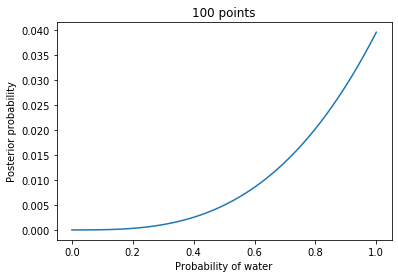

In [2]:
nsamples = 100
prior = np.ones(100)

# (1) W, W, W
plot2e5(prior, nsamples, 3, 3)

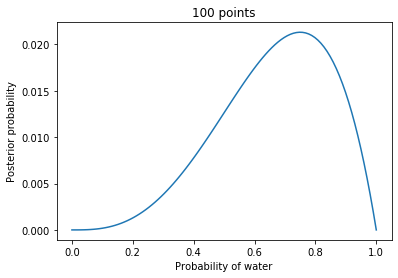

In [3]:
# (2) W, W, W, L
plot2e5(prior, nsamples, 3, 4)

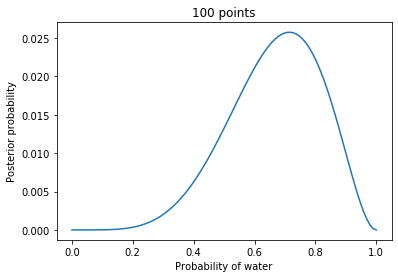

In [4]:
# (3) L, W, W, L, W, W, W
plot2e5(prior, nsamples, 5, 7)

## 2M2.

In [5]:
# first define the new prior, the rest as before
prior = np.ones(nsamples)
prior[np.where(np.linspace(0, 1, nsamples) < 0.5)] = 0

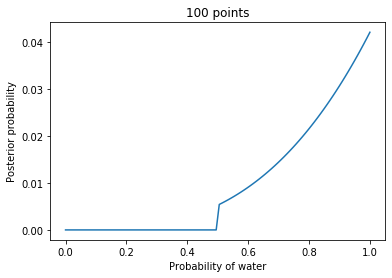

In [6]:
# (1) W, W, W
plot2e5(prior, nsamples, 3, 3)

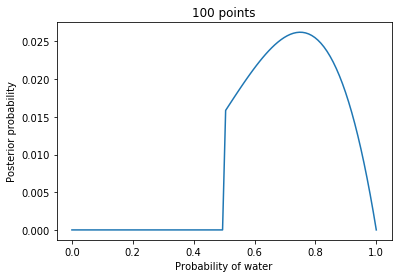

In [7]:
# (2) W, W, W, L
plot2e5(prior, nsamples, 3, 4)

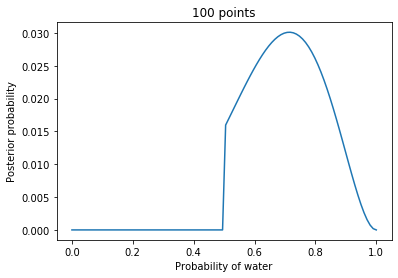

In [8]:
# (3) L, W, W, L, W, W, W
plot2e5(prior, nsamples, 5, 7)

## 2M3.
Let's define Earth as *E* and Mars as *M*, *L* is Land. We using Bayes theorem, we can write the probability Pr(E | L) as:
$$\Pr(E|L) = \frac{\Pr(L|E) \Pr(E)}{Pr(L)}$$

The probability that it is land given that it is Earth is 0.3 (1 - 0.7). The probability for it being Earth is 0.5. The only thing missing is the probability for it being land (Pr(L)).

The bottom equation of page 37 states the equation for the marginal likelihood:

$$\Pr(x, y) = \int \Pr(x,y|p) \Pr(p) dp$$

In our case this means that we can calculate the total likelihood Pr(L) as:
$$\Pr(L) = \Pr(L|E) \Pr(E) + \Pr(L|M) \Pr(M)$$

Everything in this equation is given and calculating gives us:

$$\Pr(L) = 0.3 \cdot 0.5 + 1 \cdot 0.5 = 0.65$$

Thus we can now calculate that:

$$\Pr(E|L) = \frac{0.3 \cdot 0.5}{0.65} = 0.23$$

## 2M4.

We have three cards total, let's name them C1, C2, and C3. Further we know that C1 has two black sides (b1, b2), C2 has 1 black (b) and one white side (w) and C3 has two white sides (w1, w2). Randomly drawing a card and putting it on the table results in the following possibilities

* C1b1
* C1b2
* C2b
* C2w
* C3w1
* C3w2

Furthermore we know that the first draw that happened showed a black side. This means that we only have the following possibilities left:

* C1b1
* C1b2
* C2b

For two of these possibilities (C1), the other side is black as well. Only for one possibility, the other side is white. The total probability that the other side is black is thus 2/3.

##  2M5.

There is now a fourth card, C4 with two black sides (b1 and b2). Again, all the white sides are immediately rejected after the first black side shows up. Thus, after the first draw we are left with the following possibilities:

* C1b1
* C1b2
* C4b1
* C4b2
* C2b

Only C2b has a white side on the other side, so the probability for the other side to be black is 4/5.

## 2M6.

We know a black card is drawn, so the chance of drawing a white card is zero (the three times more likely is a red hering here...). Either way, we are left with the same situation as in 2M4, except that the prior are different. Writing the priors as well we get:

* 1, C1b1
* 1, C1b2
* 2, C2b

So drawing the second card is twice as likely than drawing the first card. In total, the probability of the other side being black is:

$$\frac{1_{C1b1} + 1_{C1b2}}{1_{C1b1} + 1_{C1b2} + 2_{C2b}} = 0.5$$

Note that the prior takes care of the higher probability that the C2 is drawn and that the individual probability are still 1. 

## 2M7.

Let's start after the first draw and keep the names the same as in 2M4. The possible white cards than can be drawn after drawing C1b1 or C1b2 are:
* C2w
* C3w1
* C3w2
The possible white cards that can be drawn after drawing C2b are:
* C3w1
* C3w2

Summing up the all the ways to draw a white card as the second (8) and dividing the number of possibilities that origin from C1 by this number (6), we get a total of 0.75.


## 2H1.

We know that species A gives birth in 10% of the cases to twins, species B 20%. The first mother gave twins, thus we have either 0.1 from species A or 0.2 from species B. The second time around, the chances for giving birth to twins are:

$$0.1 \cdot 0.1 + 0.2 \cdot 0.2$$

However, this needs to be normalized by 0.3, the total number of cases that the mother first gave birth to twins. thus the total probability is:

$$\frac{0.1 \cdot 0.1 + 0.2\cdot0.2}{0.1+0.3} = 0.17$$

Now this is the way with counting. The Bayesan way is given on the website listed at the beginning. In brief we know from the question itself that:

$$\Pr(A) = 0.5\\
\Pr(B) = 0.5\\
\Pr(T|A) = 0.1\\
\Pr(T|B) = 0.2$$

Here, *T* stands for twins, *S* for a single offspring. The marginal probability of twins on the first birth can be calculated as:

$$\Pr(T) = \Pr(T|A) \Pr(A) + \Pr(T|B) \Pr(B) = 0.15$$

*Note*: It is important here that Pr(A) + Pr(B) sum up to unity, since marginal probabilities are normed to one. Using Bayes theorem, the probability that it was either species A or species B from the observations that the first birth was twins can be calculated as:

$$\Pr(A|T) = \frac{\Pr(T|A) \cdot \Pr(A)}{\Pr(T)} = \frac{0.1 \cdot 0.5}{0.15} = \frac{1}{3}\\
\Pr(B|T) = \frac{\Pr(T|B) \cdot \Pr(B)}{\Pr(T)} = \frac{0.2 \cdot 0.5}{0.15} = \frac{2}{3}$$

Using these numbers as the prior, we can now simply calculate the marginalized probability as:

$$\Pr(T) = \Pr(T|A) \Pr(A) + \Pr(T|B) \Pr(B) = 0.1 \cdot \frac{1}{3} + 0.2 \cdot \frac{2}{3} = 0.17$$

## 2H2.

We have already calculated this probability above as

$$\Pr(A|T) = \frac{1}{3}$$

## 2H3.

Our priors are now:

$$\Pr(A) = \frac{1}{3}\\
\Pr(B) = \frac{2}{3}$$

The probability that it is species A given the second birth is one child (S) is:

$$\Pr(A|S) = \frac{\Pr(S|A) \Pr(A)}{\Pr(S)}$$

We know from before that

$$\Pr(S|A) = 0.9.$$

Furthermore, we can calculate Pr(S) as the marginal probability:

$$\Pr(S) = \Pr(S|A) \Pr(A) + \Pr(S|B) \Pr(B) = 0.9 \cdot \frac{1}{3} + 0.8 \cdot \frac{2}{3} = 0.83$$

Thus we can calculate:

$$\Pr(A|S) = \frac{0.9 \cdot 0.33}{0.83} = 0.36$$

## 2H4.

No prior knowledge thus the prior for it being A or B is 1 in each case. From the Vet we know that the likelihood of the tests are:

$$\Pr(saysA|A) = 0.8\\
\Pr(saysA|B) = 1 - 0.65 = 0.35$$

We can thus calculate. The posterior probability is thus:

$$\Pr(saysA) = \frac{\Pr(saysA|A)}{\Pr(saysA|A) + \Pr(saysA|B)} = 0.696$$

In python code this looks like this:

In [9]:
import numpy as np
prior = np.array([1, 1])
likelihood = np.array([0.8, 0.35])
posterior = prior * likelihood
# norm the posterior
posterior /= np.sum(posterior)
# now display the probability for Pr(saysA|A)
print(posterior[0])

0.6956521739130436


Having some prior information, e.g., that the chance of it being A is 0.36 (as shown in 2H3), we can update the calculation with a different prior:

In [10]:
import numpy as np
prior = np.array([0.36, 1-0.36])
likelihood = np.array([0.8, 0.35])
posterior = prior * likelihood
# norm the posterior
posterior /= np.sum(posterior)
# now display the probability for Pr(saysA|A)
print(posterior[0])

0.5625


This result is different from both links given above. The difference to the first link is obvious (see discussion under the post). The difference to the second link comes from the fact that there 0.1 and 0.2 are used as the prior, which is only when considering the first birth (T) but not the second one (S), which we of course have too (2H3.).